# AluraStore - Análise de Dados de Vendas

## 1. Importação dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the CSV files with correct paths
loja = pd.read_csv("base-de-dados-challenge-1/loja_1.csv")
loja2 = pd.read_csv("base-de-dados-challenge-1/loja_2.csv")
loja3 = pd.read_csv("base-de-dados-challenge-1/loja_3.csv")
loja4 = pd.read_csv("base-de-dados-challenge-1/loja_4.csv")

# Display the first rows to confirm it's working
loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
def formatar_faturamento(valor):
    if valor >= 1_000_000_000:
        return f"R$ {valor / 1_000_000_000:.2f} bilhões"
    elif valor >= 1_000_000:
        return f"R$ {valor / 1_000_000:.2f} milhões"
    elif valor >= 1_000:
        return f"R$ {valor / 1_000:.2f} mil"
    else:
        return f"R$ {valor:.2f}"

# Cálculo dos faturamentos
Faturamento_1 = sum(loja['Preço'])
Faturamento_2 = sum(loja2['Preço'])
Faturamento_3 = sum(loja3['Preço'])
Faturamento_4 = sum(loja4['Preço'])

# Lista com os valores brutos
faturamentos = [Faturamento_1, Faturamento_2, Faturamento_3, Faturamento_4]

# Exibição dos faturamentos formatados
for i, valor in enumerate(faturamentos, start=1):
    print(f"Faturamento da loja {i}: {formatar_faturamento(valor)}")


Faturamento da loja 1: R$ 1.53 milhões
Faturamento da loja 2: R$ 1.49 milhões
Faturamento da loja 3: R$ 1.46 milhões
Faturamento da loja 4: R$ 1.38 milhões


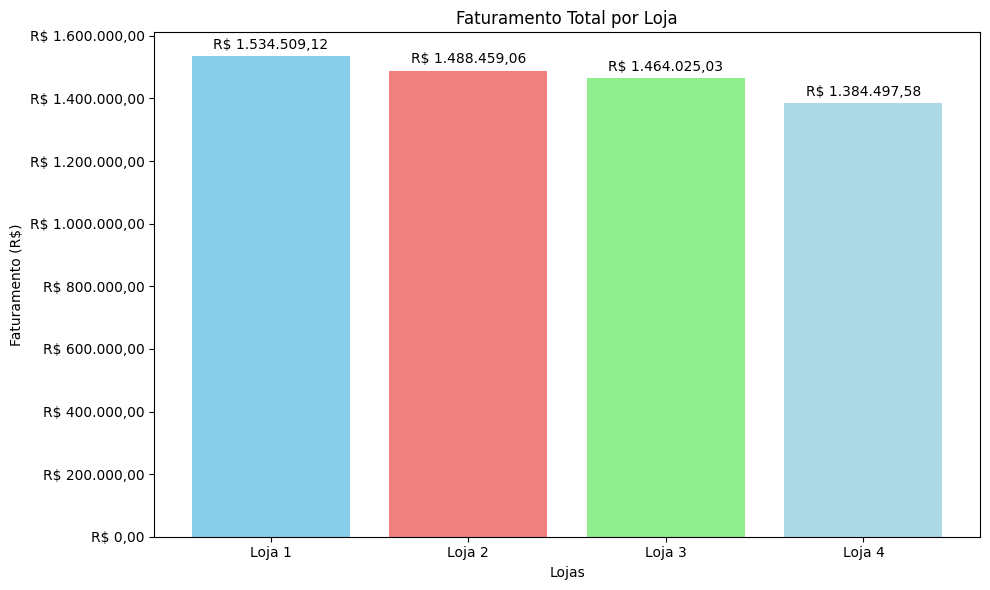

In [3]:
# Função para formatar valores em reais no estilo brasileiro
def formatar_reais(valor):
    return f"R$ {valor:,.2f}".replace(",", "v").replace(".", ",").replace("v", ".")

# Dados de faturamento (substitua pelos seus dados reais)
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [Faturamento_1, Faturamento_2, Faturamento_3, Faturamento_4]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(lojas, faturamentos, color=['skyblue', 'lightcoral', 'lightgreen', 'lightblue'])
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.title('Faturamento Total por Loja')

# Formatar o eixo y para exibir em reais com separador de milhar brasileiro
formatter = ticker.FuncFormatter(lambda x, p: formatar_reais(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Adicionar os valores acima das barras
for i, v in enumerate(faturamentos):
    plt.text(i, v + v * 0.01, formatar_reais(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


In [4]:
def analisar_vendas_por_categoria(df, loja_name):
    vendas_categoria = df.groupby('Categoria do Produto')['Preço'].sum()
    print(f"\nVendas por categoria da {loja_name}:\n")
    print(vendas_categoria)

# Analisar as vendas por categoria para cada loja
analisar_vendas_por_categoria(loja, "Loja 1")
analisar_vendas_por_categoria(loja2, "Loja 2")
analisar_vendas_por_categoria(loja3, "Loja 3")
analisar_vendas_por_categoria(loja4, "Loja 4")


Vendas por categoria da Loja 1:

Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64

Vendas por categoria da Loja 2:

Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64

Vendas por categoria da Loja 3:

Categoria do Produto
brinquedos                25869.20
eletrodomesticos         438984.89
eletronicos              547699.92
esporte e lazer           47456.10
instrumentos musicais    103174.45
livros                    12664.70
moveis   

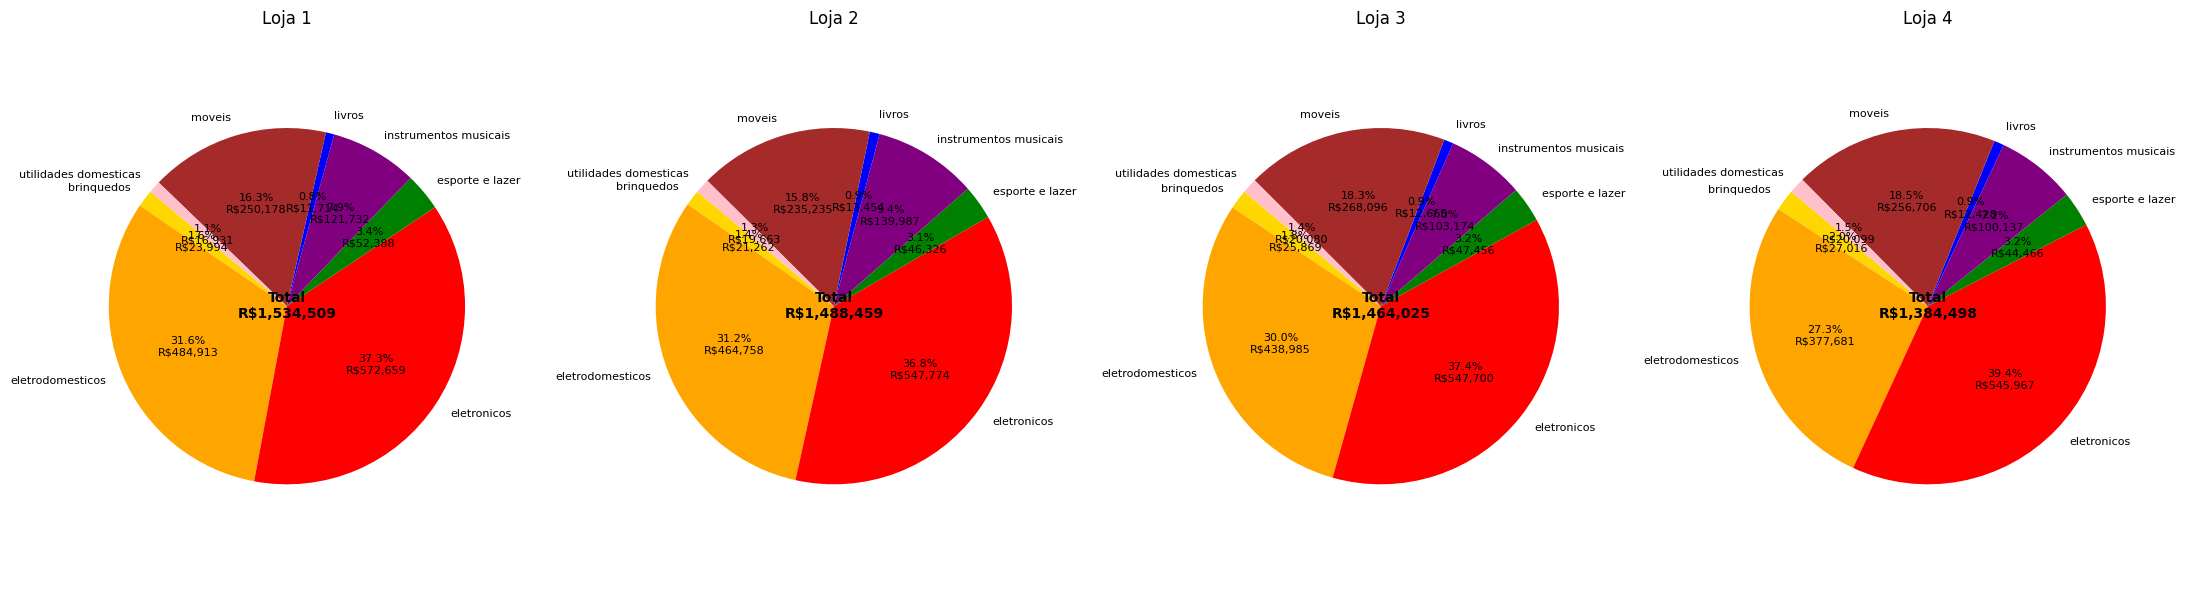

In [5]:
# Dicionário de cores fixas para cada categoria
cores_por_categoria = {
    'brinquedos': 'gold',
    'eletrodomesticos': 'orange',
    'eletronicos': 'red',
    'esporte e lazer': 'green',
    'instrumentos musicais': 'purple',
    'livros': 'blue',
    'moveis': 'brown',
    'utilidades domesticas': 'pink'
}

def plotar_pizza_faturamento(ax, df, loja_name):
    vendas_categoria = df.groupby('Categoria do Produto')['Preço'].sum()
    categorias = vendas_categoria.index.tolist()
    valores = vendas_categoria.values.tolist()
    cores = [cores_por_categoria.get(cat, 'gray') for cat in categorias]

    total = sum(valores)

    # Pie chart com valores e porcentagem
    wedges, texts, autotexts = ax.pie(
        valores,
        labels=categorias,
        autopct=lambda pct: f'{pct:.1f}%\nR${pct/100 * total:,.0f}',
        colors=cores,
        startangle=140,
        textprops={'fontsize': 8}
    )

    ax.set_title(f'{loja_name}', fontsize=12)
    ax.axis('equal')

    # Texto central com faturamento total
    ax.text(0, 0, f'Total\nR${total:,.0f}', ha='center', va='center', fontsize=10, fontweight='bold')

# Criar a figura com 4 subplots lado a lado
fig, axs = plt.subplots(1, 4, figsize=(22, 6))

# Gerar os gráficos para cada loja
plotar_pizza_faturamento(axs[0], loja, "Loja 1")
plotar_pizza_faturamento(axs[1], loja2, "Loja 2")
plotar_pizza_faturamento(axs[2], loja3, "Loja 3")
plotar_pizza_faturamento(axs[3], loja4, "Loja 4")

# Exibir os gráficos
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [11]:
#Média de avaliações por loja
media_avaliacoes_1 = loja['Avaliação da compra'].mean()
media_avaliacoes_2 = loja2['Avaliação da compra'].mean()
media_avaliacoes_3 = loja3['Avaliação da compra'].mean()
media_avaliacoes_4 = loja4['Avaliação da compra'].mean()

# Exibir resultados formatados
print("Media de Avaliações: ")
print(f"Loja 1: {media_avaliacoes_1:.2f}")
print(f"Loja 2: {media_avaliacoes_2:.2f}")
print(f"Loja 3: {media_avaliacoes_3:.2f}")
print(f"Loja 4: {media_avaliacoes_4:.2f}")

Media de Avaliações: 
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


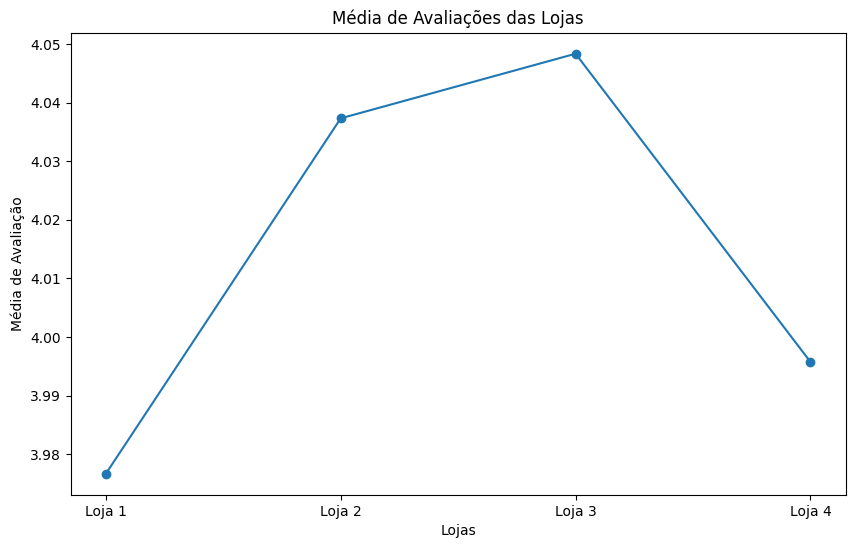

In [7]:
# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'], [media_avaliacoes_1, media_avaliacoes_2, media_avaliacoes_3, media_avaliacoes_4], marker='o', linestyle='-')

# Adicionando título e labels
plt.title('Média de Avaliações das Lojas')
plt.xlabel('Lojas')
plt.ylabel('Média de Avaliação')

# Exibindo o gráfico
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [8]:
# Armazenado os DataFrames em um dicionario
lojas_dataframes = {
    'Loja 1': loja,
    'Loja 2': loja2,
    'Loja 3': loja3,
    'Loja 4': loja4
}

# Inicializa dicionários para armazenar os resultados
campeoes_vendas = {}
produtos_fracos = {}

# Analisa cada loja e identifica produtos mais/menos vendidos
for nome_loja, filial_df in lojas_dataframes.items():
    # Calcula a frequência de cada produto
    contagem_vendas = filial_df["Produto"].value_counts()

    # Identifica o produto mais e menos vendido
    destaque_vendas = contagem_vendas.idxmax()
    produto_encalhado = contagem_vendas.idxmin()

    # Armazena os produtos e suas quantidades
    campeoes_vendas[nome_loja] = (destaque_vendas, contagem_vendas.max())
    produtos_fracos[nome_loja] = (produto_encalhado, contagem_vendas.min())

# Cria DataFrame com os resultados
resumo_vendas = pd.DataFrame({
    'Campeao_Vendas': [item for item, qtd in campeoes_vendas.values()],
    'Quantidade_Maxima': [qtd for item, qtd in campeoes_vendas.values()],
    'Produto_Encalhado': [item for item, qtd in produtos_fracos.values()],
    'Quantidade_Minima': [qtd for item, qtd in produtos_fracos.values()]
})

# Define os nomes das lojas como índice
resumo_vendas.index = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Exibe o resultado com melhor formatação
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
print(resumo_vendas)


                  Campeao_Vendas  Quantidade_Maxima  Produto_Encalhado  Quantidade_Minima
Loja 1               Micro-ondas                 60            Headset                 33
Loja 2  Iniciando em programação                 65  Jogo de tabuleiro                 32
Loja 3             Kit banquetas                 57   Blocos de montar                 35
Loja 4                  Cama box                 62           Guitarra                 33


# 5. Frete Médio por Loja


In [9]:
# Cálculo do frete médio por loja
frete_medio_1 = loja['Frete'].mean()
frete_medio_2 = loja2['Frete'].mean()
frete_medio_3 = loja3['Frete'].mean()
frete_medio_4 = loja4['Frete'].mean()

print(f"Frete médio da Loja 1: R${frete_medio_1:.2f}")
print(f"Frete médio da Loja 2: R${frete_medio_2:.2f}")
print(f"Frete médio da Loja 3: R${frete_medio_3:.2f}")
print(f"Frete médio da Loja 4: R${frete_medio_4:.2f}")


Frete médio da Loja 1: R$34.69
Frete médio da Loja 2: R$33.62
Frete médio da Loja 3: R$33.07
Frete médio da Loja 4: R$31.28


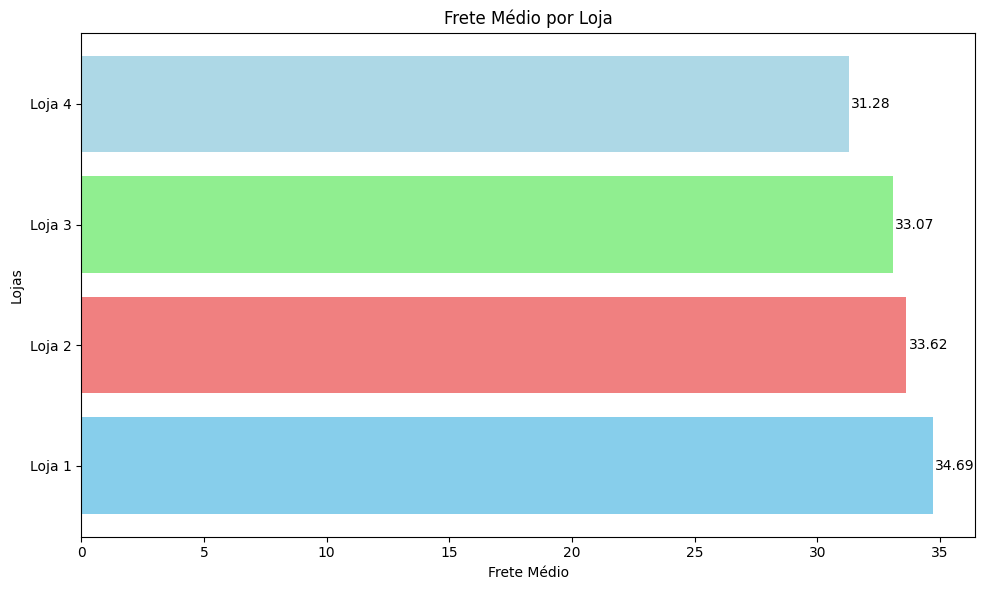

In [10]:
import matplotlib.pyplot as plt

# Dados de frete médio (substitua pelos seus dados reais)
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
fretes_medios = [frete_medio_1, frete_medio_2, frete_medio_3, frete_medio_4]

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(lojas, fretes_medios, color=['skyblue', 'lightcoral', 'lightgreen', 'lightblue'])
plt.xlabel('Frete Médio')
plt.ylabel('Lojas')
plt.title('Frete Médio por Loja')

# Adicionar os valores ao lado de cada barra
for i, v in enumerate(fretes_medios):
    plt.text(v + 0.1, i, f'{v:.2f}', va='center')

plt.tight_layout()
plt.show()


# 6. Relatório Descritivo: Análise de Lojas para Novo Empreendimento

## Resumo Executivo

Baseado na análise dos dados disponíveis, este relatório avalia qual das quatro lojas apresenta o melhor potencial para ser substituída por um novo empreendimento. A avaliação considera múltiplos fatores: faturamento, desempenho por categoria, avaliação dos clientes, produtos mais/menos vendidos e custos logísticos.

## Análise Comparativa

### 1. Faturamento Total
- **A Loja 4 apresenta o menor faturamento** (R$ 1.38 milhões) entre todas as unidades
- As Lojas 1, 2 e 3 mostram desempenho financeiro superior (R$ 1.53, R$ 1.49 e R$ 1.46 milhões respectivamente)

### 2. Desempenho por Categoria
- A análise gráfica mostra que cada loja tem um mix de produtos diferente
- **A Loja 4 apresenta menor faturamento em eletrodomésticos** (R$ 377.680,65), uma categoria importante de alto valor

### 3. Avaliação dos Clientes
- **A Loja 1 tem a menor média de avaliações** (3.98) entre as quatro lojas
- **A Loja 3 apresenta a melhor média de avaliações** (4.05)
- A Loja 4 tem uma avaliação média de 4.00, ficando em terceiro lugar

### 4. Produtos Mais e Menos Vendidos
- **A Loja 4 tem como campeão de vendas "Cama box"** (62 unidades)
- O produto mais vendido da Loja 2 ("Iniciando em programação") possui maior volume (65 unidades)
- A Loja 4 apresenta a "Guitarra" como produto encalhado (33 unidades)

### 5. Custos de Frete
- **A Loja 4 apresenta o menor frete médio** (R$ 31.28) entre todas as lojas
- A Loja 1 tem o maior frete médio (R$ 34.69)
- Esta é uma métrica positiva para a Loja 4, indicando menor custo logístico

## Conclusão e Recomendação

> **A Loja 4 é a candidata ideal para ser substituída por um novo empreendimento**, pelos seguintes motivos:

1. Apresenta o menor faturamento total entre todas as lojas (R$ 1.38 milhões)
2. Demonstra baixo desempenho em eletrodomésticos, uma categoria de alta margem
3. Tem avaliação média dos clientes (4.00) abaixo da melhor loja (4.05)
4. Mesmo com o menor custo de frete, ainda apresenta resultados financeiros inferiores

## Recomendações para o Novo Empreendimento

| Recomendação | Descrição |
|--------------|-----------|
| **Foco em categorias de alto desempenho** | Investir mais em eletrodomésticos e eletrônicos, que mostram melhor resultado nas outras lojas |
| **Melhorar a experiência do cliente** | Implementar estratégias para elevar a avaliação média para superar 4.05 |
| **Manter eficiência logística** | Preservar o baixo custo de frete que a Loja 4 já possui |
| **Diversificação estratégica** | Evitar depender de produtos como "Cama box" e introduzir maior variedade |

---

Esta substituição representa uma oportunidade de **revitalizar um ponto comercial com desempenho inferior nos aspectos financeiros**, aproveitando as vantagens logísticas já existentes (menor custo de frete) e implementando estratégias para aumentar faturamento e satisfação dos clientes.
